In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import string
import re
import nltk
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
from nltk.tokenize import TweetTokenizer
import seaborn as sns
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [2]:
df = pd.read_csv('tiktok.csv')
df.head()

,userName,score,at,content,target
0,Mm Uu,5,2023-02-07 13:17:28,Sangat mengimpirasi dan membantu tuk bersilatu...,1
1,israely miguel,1,2023-02-07 09:53:53,Kok apk ini nggak bisa di instal yah Instal le...,0
2,Md Meraj,1,2023-02-07 08:41:10,Moon,0
3,My Self,5,2023-02-07 08:12:31,Saya sangat suka karna kita bisa lihat teman2 ...,1
4,BONITOBOXING22 BENFICA22,5,2023-02-07 08:08:11,👌👌👌👌,1


In [3]:
df.dtypes

userName    object
score        int64
at          object
content     object
target       int64
dtype: object

In [4]:
text = ' '.join(df['content'].tolist())

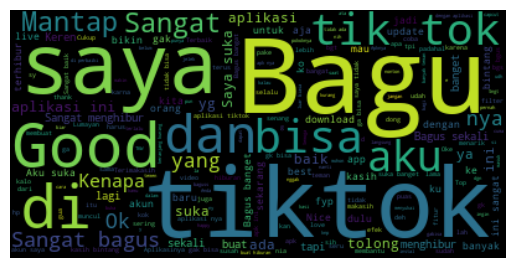

In [5]:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [6]:
def removePunctuation(strs):
    remove = string.punctuation
    remove = remove.replace("-", "") # don't remove hyphens
    remove = remove.replace("@", "") # don't remove hyphens
    remove = remove.replace("#", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern

    h = re.sub(pattern, " ", strs) 
    return h

def replace(strs):
    strs = strs.replace('\n',' ')
    strs = strs.replace('\t',' ')
    strs = strs.replace('rt',' ')
    return strs

def tokenize(strs):
    tokenizer = TweetTokenizer()
    nltk_tokens = tokenizer.tokenize(strs)
    return nltk_tokens

def removeAkunHastagsEmoji(tokens):
    regexp = re.compile(r'@[a-z]') #Hapus @
    filtered = filter(lambda i: not regexp.search(i), tokens)
    filtered = [i for i in tokens if not regexp.search(i)]
    regexp = re.compile(r'#[a-z0-9]') #Hapus #
    filtered = filter(lambda i: not regexp.search(i), filtered)
    filtered = [i for i in filtered if not regexp.search(i)]
    regexp = re.compile(r'[😂👏🙄👇🤣😅🙄🙈😀☝🙏👆😐👍🤔😊😉😌😊😉✌🤤😭😃🦄💪😔❤😑👉😆😁🙃💐⚡😎👌💯💃🎶👀☀💞😤👊✊😔🛀🙋👼👥😍✊😃💗👎🤦😁😞😡]') #Hapus Emoji
    filtered = filter(lambda i: not regexp.search(i), filtered)
    filtered = [i for i in filtered if not regexp.search(i)]
    return filtered

In [7]:
data = df
data['text'] = [str(token).lower() for token in data.content]#lowertext
data['text'] = [re.sub(r'http.*', '', i) for i in data.text] #remove link
data['text'] = [re.sub(r'<.*?>', '', i) for i in data.text] #remove html
data['text'] = [removePunctuation(i) for i in data.text] #remove punctuation
data['text'] = [replace(j) for j in data.text] #replace \n \t rt
data['token'] = [nltk.word_tokenize(i) for i in data.text] #tokenize string
data['token'] = [removeAkunHastagsEmoji(i) for i in data.token]

In [8]:
data.head()

,userName,score,at,content,target,text,token
0,Mm Uu,5,2023-02-07 13:17:28,Sangat mengimpirasi dan membantu tuk bersilatu...,1,sangat mengimpirasi dan membantu tuk bersilatu...,"[sangat, mengimpirasi, dan, membantu, tuk, ber..."
1,israely miguel,1,2023-02-07 09:53:53,Kok apk ini nggak bisa di instal yah Instal le...,0,kok apk ini nggak bisa di instal yah instal le...,"[kok, apk, ini, nggak, bisa, di, instal, yah, ..."
2,Md Meraj,1,2023-02-07 08:41:10,Moon,0,moon,[moon]
3,My Self,5,2023-02-07 08:12:31,Saya sangat suka karna kita bisa lihat teman2 ...,1,saya sangat suka karna kita bisa lihat teman2 ...,"[saya, sangat, suka, karna, kita, bisa, lihat,..."
4,BONITOBOXING22 BENFICA22,5,2023-02-07 08:08:11,👌👌👌👌,1,👌👌👌👌,[]


In [9]:
stopwords = nltk.corpus.stopwords.words('indonesian')
stopwords.extend(['yg','tok','nya','tik','tkw','nx','gk','bgs','deh','gw','knpa','knp','nia','dg','dgn','bgs','sy','ga','gak','ny','klo','yag','yah','d','sek','mfia','bisness','fideo','tuk','dan','n','dn','sih','tdk','ku','bisah','mendanlow','tida','se','ad','enk','pke','krnjg','dlu',
'bru','bgt','iyan','ente','ains','huhu','kayak','pe','ama','eh','ইসমাঈল','gx','ko','tirifkk','rik','krennnn','nicwe','rh','marisia','bguss','says','bgus','tq','is','bc','it','sad','me','makes','broke','ccd','hhhhhhhhhhhhhhhhhhaa','elo','w','gua','mah','nih','elu','sih','nia','zte','ffg','67','a','c',
'seruuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuu','كويس ','টক ','ইটক ','menhibur','aja','ya','karna','apk','apl','sagat','sngt','smoga','banget','so','titok','baget','bagat','madep','bnget','bintan','tpi','anj','wawas','sya','app','tmbh','ajar','biar','the','bngt','you','very','nggak','ajar','bangat','dah','kalo','kasi','apknya'])

def clean_stopwords(text):
    res = []
    for word in text:
        if word not in stopwords and len(word) > 3 :
            res.append(word)
    return res

data['token_bersih'] = [clean_stopwords(i) for i in data.token]

In [10]:
data.head()

,userName,score,at,content,target,text,token,token_bersih
0,Mm Uu,5,2023-02-07 13:17:28,Sangat mengimpirasi dan membantu tuk bersilatu...,1,sangat mengimpirasi dan membantu tuk bersilatu...,"[sangat, mengimpirasi, dan, membantu, tuk, ber...","[mengimpirasi, membantu, bersilaturrahmi, kese..."
1,israely miguel,1,2023-02-07 09:53:53,Kok apk ini nggak bisa di instal yah Instal le...,0,kok apk ini nggak bisa di instal yah instal le...,"[kok, apk, ini, nggak, bisa, di, instal, yah, ...","[instal, instal, google, chrome, baguss]"
2,Md Meraj,1,2023-02-07 08:41:10,Moon,0,moon,[moon],[moon]
3,My Self,5,2023-02-07 08:12:31,Saya sangat suka karna kita bisa lihat teman2 ...,1,saya sangat suka karna kita bisa lihat teman2 ...,"[saya, sangat, suka, karna, kita, bisa, lihat,...","[suka, lihat, teman2]"
4,BONITOBOXING22 BENFICA22,5,2023-02-07 08:08:11,👌👌👌👌,1,👌👌👌👌,[],[]


In [11]:
data.token_bersih.unique

<bound method Series.unique of 0       [mengimpirasi, membantu, bersilaturrahmi, kese...
1                [instal, instal, google, chrome, baguss]
2                                                  [moon]
3                                   [suka, lihat, teman2]
4                                                      []
                              ...                        
1844                                                   []
1845    [aplikasi, tiktok, menghibur, suka, terima, ka...
1846                           [every, good, inte, aning]
1847    [duet, video, orang, video, hapus, alasan, mel...
1848                                        [fidoe, film]
Name: token_bersih, Length: 1849, dtype: object>

In [12]:
for i,v in enumerate(data.token_bersih):
    if len(v) == 0:
        data = data.drop(index=i)

In [13]:
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
data['token_bersih'] = [stopword.remove(str(token)) for token in data.token_bersih]


In [14]:
factory1 = StemmerFactory()
stemmer = factory1.create_stemmer()
data['token_bersih'] = [stemmer.stem(str(token)) for token in data.token_bersih]


In [15]:
vectorizer = TfidfVectorizer()
data_vektor = vectorizer.fit_transform(data['token_bersih'])
data_vektor

<1565x1635 sparse matrix of type '<class 'numpy.float64'>'
	with 3854 stored elements in Compressed Sparse Row format>

In [56]:
lda = LatentDirichletAllocation(n_components = 7, random_state = 0)
lda.fit(data_vektor)

LatentDirichletAllocation(n_components=7, random_state=0)

In [57]:
data_vektor.shape

(1565, 1635)

In [58]:
data_vektor

<1565x1635 sparse matrix of type '<class 'numpy.float64'>'
	with 3854 stored elements in Compressed Sparse Row format>

In [59]:

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(lda.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))


feature_names = vectorizer.get_feature_names_out()

# n fitur terbaik untuk setiap topik
no_top_words = 20
display_topics(lda, feature_names, no_top_words)


Topic 0:
bagus suka aplikasi keren tiktok seru terima pokok jelek lucu orang akun bagussssss josss baru download hibur update masyarakat kerja
Topic 1:
bintang tiktok like kasih buka download hibur udah verry thanks langsung akun bagussss guna awesome hasil iklan uang pake cari
Topic 2:
good mantap tarik terimakasih tiktok happy kecewa emang akun bantu sukaaaa atur bangt tolong login perangkat efek live kren bangus
Topic 3:
nice lumayan puas love ajar manfaat coba tiktok asik amazing siip mantep efek ken coin kasih temen poko bantu baguusss
Topic 4:
baik baguss inspirasi filter muas tiktok bantu promosi main thank gaya meyenangkan tampil game tolong sayang update this great dah
Topic 5:
hibur best tiktok bikin video live makasih aplikasi kuning suka susah nonton ikut tambah keranjang teman bagusss pokok hilang tolong
Topic 6:
senang tiktok tolong install teman poko mntap suka masuk bantu orang dowload bicara seru sumpah eror bikin akun baik cakep


In [ ]:
# Simpan kata-kata kunci dari setiap topik ke dalam list
topics = []

for topic_idx, topic in enumerate(lda.components_):
    topic_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
    topics.append(topic_words)

# Gabungkan topik 0 hingga 3 menjadi satu list
combined_topics = []
for i in range(4):
    combined_topics += topics[i]

combined_topics

In [61]:
prompt = "Buatkan kalimat dari topik " + "[" + ", ".join(combined_topics) + "]"
prompt

'Buatkan kalimat dari topik [bagus, suka, aplikasi, keren, tiktok, seru, terima, pokok, jelek, lucu, orang, akun, bagussssss, josss, baru, download, hibur, update, masyarakat, kerja, bintang, tiktok, like, kasih, buka, download, hibur, udah, verry, thanks, langsung, akun, bagussss, guna, awesome, hasil, iklan, uang, pake, cari, good, mantap, tarik, terimakasih, tiktok, happy, kecewa, emang, akun, bantu, sukaaaa, atur, bangt, tolong, login, perangkat, efek, live, kren, bangus, nice, lumayan, puas, love, ajar, manfaat, coba, tiktok, asik, amazing, siip, mantep, efek, ken, coin, kasih, temen, poko, bantu, baguusss]'

In [63]:
import openai

completion = openai.ChatCompletion.create(model="gpt-3.5-turbo", messages=[{"role": "user", "content": "Buatkan list kalimat yang sesuai dari topik [bagus, suka, aplikasi, keren, tiktok, seru, terima, pokok, jelek, lucu, orang, akun, bagussssss, josss, baru, download, hibur, update, masyarakat, kerja, bintang, tiktok, like, kasih, buka, download, hibur, udah, verry, thanks, langsung, akun, bagussss, guna, awesome, hasil, iklan, uang, pake, cari, good, mantap, tarik, terimakasih, tiktok, happy, kecewa, emang, akun, bantu, sukaaaa, atur, bangt, tolong, login, perangkat, efek, live, kren, bangus, nice, lumayan, puas, love, ajar, manfaat, coba, tiktok, asik, amazing, siip, mantep, efek, ken, coin, kasih, temen, poko, bantu, baguusss]"}])
print(completion.choices[0].message.content)

1. Aplikasi TikTok sangat seru dan bikin hibur hati.
2. Saya suka banget dengan efek-efek keren di TikTok.
3. Terima kasih untuk update baru di TikTok, semakin bagussssss!
4. Orang-orang sekarang banyak yang menggunakan TikTok untuk menghibur diri.
5. Akun TikTok saya akhir-akhir ini sering mendapatkan like dan bintang.
6. Saya udah download TikTok dari dulu dan sangat terima kasih karena sangat berguna untuk hibur diri di rumah.
7. Bagussssss, TikTok memang aplikasi yang sangat bagus untuk menghibur masyarakat yang sedang bekerja di rumah.
8. Pokoknya kalau kamu lagi kecewa, langsung buka TikTok untuk menghibur diri.
9. TikTok dengan efek-efeknya yang kren bisa bantu saya untuk atur mood.
10. Mantap, TikTok memberikan banyak manfaat bagi orang-orang.
11. Saya love TikTok karena efek keren dan asik banget.
12. Aplikasi TikTok memang amazing, semua efeknya siip dan mantep!
13. Bagusss, TikTok memberikan hasil yang lumayan dengan coin.
14. Terima kasih TikTok atas kemudahan login pada se

In [65]:
txt = openai.ChatCompletion.create(model="gpt-3.5-turbo", messages=[{"role": "user", "content": "Buatkan suatu paragraf dengan formal dari topik [bagus, suka, aplikasi, keren, tiktok, seru, terima, pokok, jelek, lucu, orang, akun, bagussssss, josss, baru, download, hibur, update, masyarakat, kerja, bintang, tiktok, like, kasih, buka, download, hibur, udah, verry, thanks, langsung, akun, bagussss, guna, awesome, hasil, iklan, uang, pake, cari, good, mantap, tarik, terimakasih, tiktok, happy, kecewa, emang, akun, bantu, sukaaaa, atur, bangt, tolong, login, perangkat, efek, live, kren, bangus, nice, lumayan, puas, love, ajar, manfaat, coba, tiktok, asik, amazing, siip, mantep, efek, ken, coin, kasih, temen, poko, bantu, baguusss]"}])
print(txt.choices[0].message.content)

TikTok merupakan salah satu aplikasi hiburan yang sedang digemari masyarakat. Dengan fitur yang seru dan terus diperbarui, membuat orang semakin suka dan menyukai aplikasi ini. Efek live yang keren dan banyak pilihan, termasuk atur bintang yang bagus, menjadikan aplikasi ini sangat menarik untuk di-download. Buat orang yang membutuhkan hiburan dan terhibur, TikTok bisa menjadi pilihan yang bagus. Terimakasih TikTok, sudah membantu saya dan banyak orang untuk merasa happy dan senang. Meski kadang ada kecewa jika akun orang yang di-like ternyata jelek, tapi tetap ada efek lucu yang bisa menghibur. Buat saya, TikTok adalah aplikasi yang sangat bermanfaat dan awesome. Dengan menggunakan aplikasi ini, saya berhasil mendapatkan banyak teman dan juga hasil dari iklan yang dipasang di akun saya, yang jelas membuat saya mendapatkan banyak coin dan uang. Pokoknya, terimakasih TikTok, kamu memang bangus dan siip!


In [66]:
with open('kalimat_output.txt', 'w') as f:
    f.write(str(completion))

In [67]:
with open('paragraph_output.txt', 'w') as f:
    f.write(str(txt))

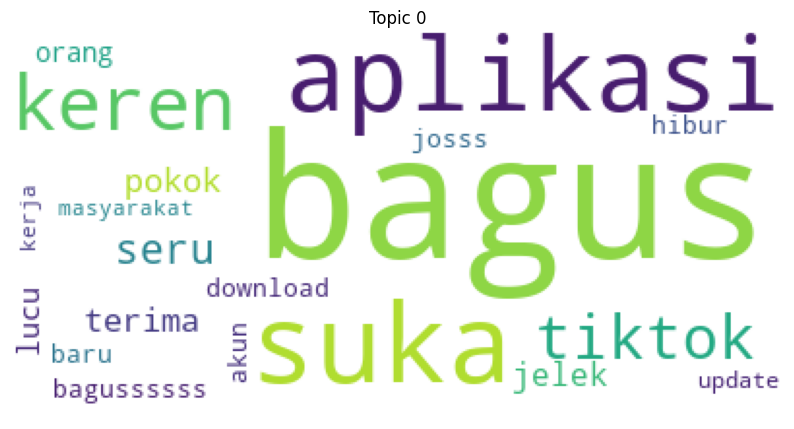

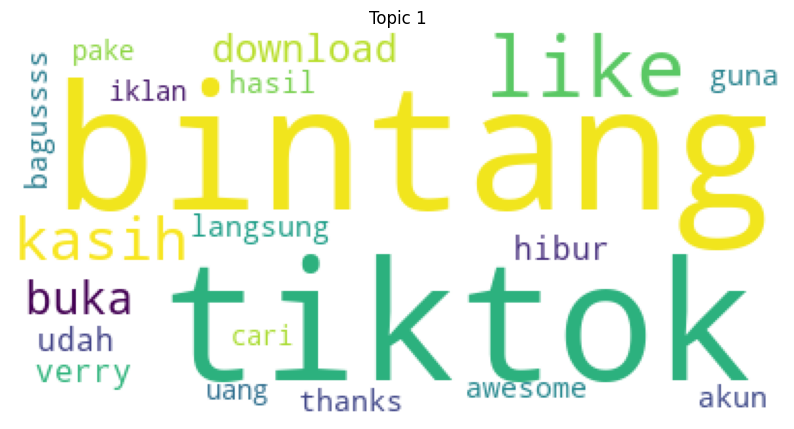

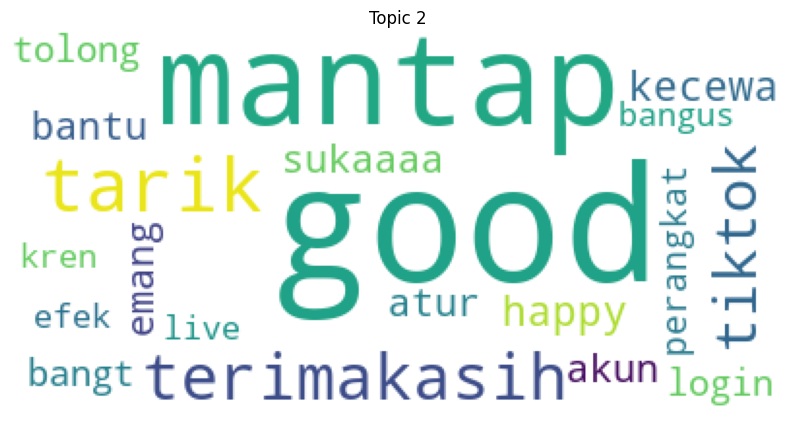

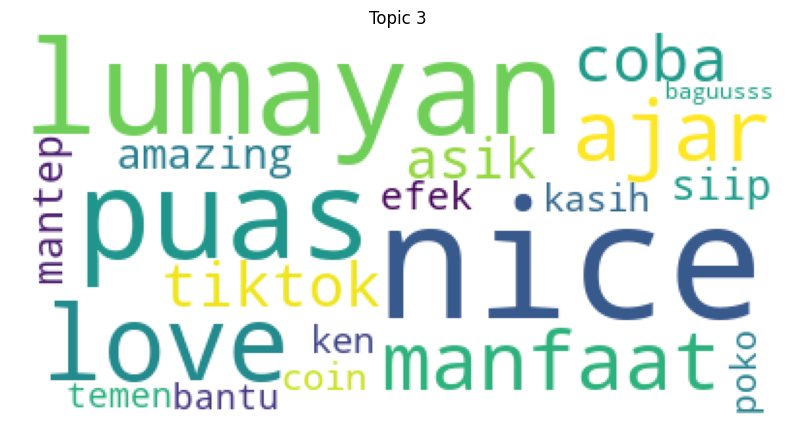

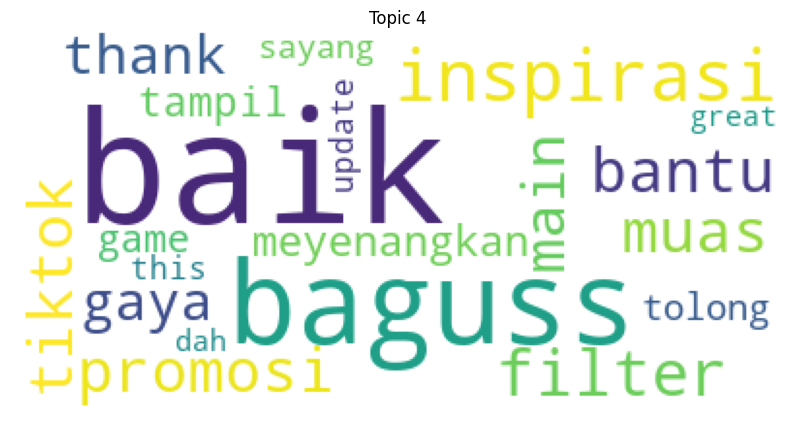

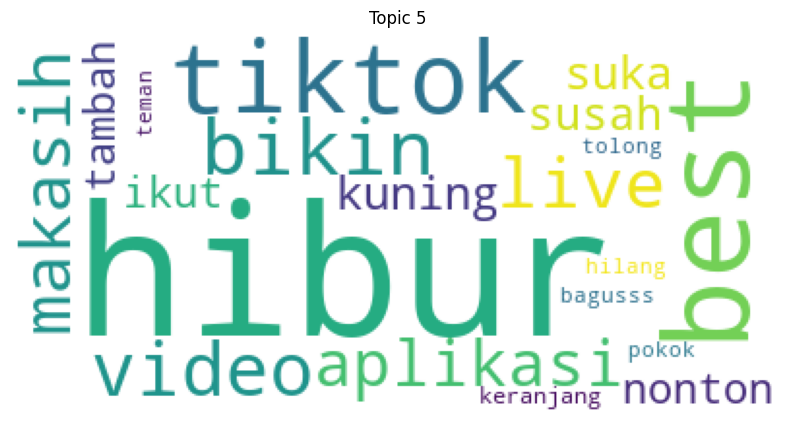

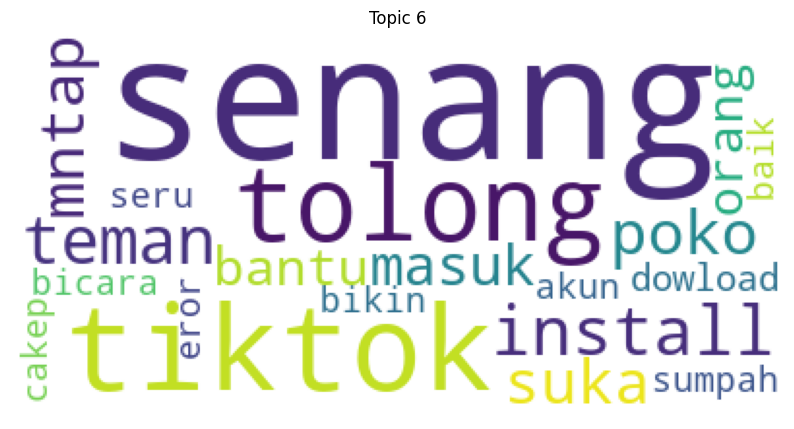

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def display_topics_wordcloud(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(lda.components_):
        plt.figure(figsize=(10, 6))
        plt.imshow(WordCloud(background_color='white').fit_words({feature_names[i]: topic[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]}))
        plt.axis("off")
        plt.title("Topic %d" % (topic_idx))
        plt.show()

# n fitur terbaik untuk setiap topik
no_top_words = 20
display_topics_wordcloud(lda, feature_names, no_top_words)
